In [1]:
import os
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.externals import joblib

Normal activity.

In [2]:
df = pd.read_csv('data.csv')
X_train, X_test = train_test_split(df)

df_normal = pd.read_csv('normal.csv')
df_abnormal = pd.read_csv('abnormal.csv')

Learn with One Class SVM.<br>
1 means normal.<br>
-1 means outlier.<br>

In [3]:
nu_list = [0.01, 0.001, 0.0001]
gamma_list = [0.01, 0.001, 0.0001]

for nu in nu_list:
    for gamma in gamma_list:
        clf = svm.OneClassSVM(nu=nu, kernel="rbf", gamma=gamma)
        clf.fit(X_train)
        
        X_pred_1day = clf.predict(df_abnormal.loc[:23, ['time', 'value']])
        print('nu=' + '{:.4f}'.format(nu) + ' ' + 'gamma=' + '{:.4f}'.format(gamma) + ' ' + str(X_pred_1day))

nu=0.0100 gamma=0.0100 [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1]
nu=0.0100 gamma=0.0010 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
nu=0.0100 gamma=0.0001 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
nu=0.0010 gamma=0.0100 [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1 -1  1  1  1]
nu=0.0010 gamma=0.0010 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
nu=0.0010 gamma=0.0001 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
nu=0.0001 gamma=0.0100 [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1]
nu=0.0001 gamma=0.0010 [ 1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1]
nu=0.0001 gamma=0.0001 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [4]:
nu_list = [0.01, 0.001, 0.0001]
gamma_list = [0.01, 0.001, 0.0001]

for nu in nu_list:
    for gamma in gamma_list:
        clf = svm.OneClassSVM(nu=nu, kernel="rbf", gamma=gamma)
        clf.fit(X_train)
        X_pred = clf.predict(df_abnormal.loc[:, ['time', 'value']])
        
        fn = 0
        fp = 0
        tn = 0
        tp = 0
        for i, res in enumerate(X_pred):
            if res == 1:
                if res == df_abnormal.loc[i, ['tag']][0]:
                    tn += 1
                else:
                    fn += 1
            if res == -1:
                if res == df_abnormal.loc[i, ['tag']][0]:
                    tp += 1
                else:
                    fp += 1
        recall = tp / (tp + fp + 1e-09)
        precision = tp / (tp + fn + 1e-09)
        accuracy = (tp + tn) / (fn + fp + tn + tp + 1e-09)
        print('nu=' + '{:.4f}'.format(nu) + ' ' + 'gamma=' + '{:.4f}'.format(gamma) + '  Recall: ' + '{:.2f}'.format(recall) + ' Precision: ' + '{:.2f}'.format(precision) + ' Accuracy: ' + '{:.2f}'.format(accuracy))

nu=0.0100 gamma=0.0100  Recall: 1.00 Precision: 1.00 Accuracy: 1.00
nu=0.0100 gamma=0.0010  Recall: 1.00 Precision: 0.50 Accuracy: 0.97
nu=0.0100 gamma=0.0001  Recall: 1.00 Precision: 0.25 Accuracy: 0.96
nu=0.0010 gamma=0.0100  Recall: 0.80 Precision: 1.00 Accuracy: 0.99
nu=0.0010 gamma=0.0010  Recall: 1.00 Precision: 0.50 Accuracy: 0.97
nu=0.0010 gamma=0.0001  Recall: 1.00 Precision: 0.25 Accuracy: 0.96
nu=0.0001 gamma=0.0100  Recall: 1.00 Precision: 1.00 Accuracy: 1.00
nu=0.0001 gamma=0.0010  Recall: 0.67 Precision: 0.50 Accuracy: 0.96
nu=0.0001 gamma=0.0001  Recall: 1.00 Precision: 0.25 Accuracy: 0.96


Malicious activity.

In [5]:
maldf = pd.read_csv('malicious_data.csv')
malX_train, malX_test = train_test_split(maldf)

df_normal = pd.read_csv('normal.csv')
df_abnormal = pd.read_csv('abnormal.csv')

Attacker contaminates random data into the dataset.<br>
Contaminated dataset becomes useless beacause it has no feature.<br>

In [6]:
nu_list = [0.01, 0.001, 0.0001]
gamma_list = [0.01, 0.001, 0.0001]

for nu in nu_list:
    for gamma in gamma_list:
        clf = svm.OneClassSVM(nu=nu, kernel="rbf", gamma=gamma)
        clf.fit(malX_train)
        
        malX_pred_1day = clf.predict(df_abnormal.loc[:23, ['time', 'value']])
        print('nu=' + '{:.4f}'.format(nu) + ' ' + 'gamma=' + '{:.4f}'.format(gamma) + ' ' + str(malX_pred_1day))
        
        joblib.dump(clf, 'malicious_model.pkl')

nu=0.0100 gamma=0.0100 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
nu=0.0100 gamma=0.0010 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
nu=0.0100 gamma=0.0001 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
nu=0.0010 gamma=0.0100 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
nu=0.0010 gamma=0.0010 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
nu=0.0010 gamma=0.0001 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
nu=0.0001 gamma=0.0100 [ 1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1]
nu=0.0001 gamma=0.0010 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
nu=0.0001 gamma=0.0001 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [7]:
nu_list = [0.01, 0.001, 0.0001]
gamma_list = [0.01, 0.001, 0.0001]

for nu in nu_list:
    for gamma in gamma_list:
        clf = svm.OneClassSVM(nu=nu, kernel="rbf", gamma=gamma)
        clf.fit(malX_train)
        malX_pred = clf.predict(df_abnormal.loc[:, ['time', 'value']])
        
        fn = 0
        fp = 0
        tn = 0
        tp = 0
        for i, res in enumerate(malX_pred):
            if res == 1:
                if res == df_abnormal.loc[i, ['tag']][0]:
                    tn += 1
                else:
                    fn += 1
            if res == -1:
                if res == df_abnormal.loc[i, ['tag']][0]:
                    tp += 1
                else:
                    fp += 1
        recall = tp / (tp + fp + 1e-09)
        precision = tp / (tp + fn + 1e-09)
        accuracy = (tp + tn) / (fn + fp + tn + tp + 1e-09)
        print('nu=' + '{:.4f}'.format(nu) + ' ' + 'gamma=' + '{:.4f}'.format(gamma) + '  Recall: ' + '{:.2f}'.format(recall) + ' Precision: ' + '{:.2f}'.format(precision) + ' Accuracy: ' + '{:.2f}'.format(accuracy))

nu=0.0100 gamma=0.0100  Recall: 1.00 Precision: 0.25 Accuracy: 0.96
nu=0.0100 gamma=0.0010  Recall: 1.00 Precision: 0.25 Accuracy: 0.96
nu=0.0100 gamma=0.0001  Recall: 0.50 Precision: 0.25 Accuracy: 0.94
nu=0.0010 gamma=0.0100  Recall: 0.00 Precision: 0.00 Accuracy: 0.94
nu=0.0010 gamma=0.0010  Recall: 0.00 Precision: 0.00 Accuracy: 0.94
nu=0.0010 gamma=0.0001  Recall: 1.00 Precision: 0.25 Accuracy: 0.96
nu=0.0001 gamma=0.0100  Recall: 0.00 Precision: 0.00 Accuracy: 0.90
nu=0.0001 gamma=0.0010  Recall: 0.00 Precision: 0.00 Accuracy: 0.94
nu=0.0001 gamma=0.0001  Recall: 0.00 Precision: 0.00 Accuracy: 0.94


In [8]:
def graph(df, X_pred):
    # graph initialize (to avoid overlap the graph)
    plt.figure()
    xmin = df['time'].min()
    xmax = df['time'].max()
    ymin = 0
    ymax = 100
    interval = (xmax - xmin) / X_pred.size

    plt.plot(df.loc[:23,['time']], df.loc[:23,['value']], color='black', linewidth = 3.0)
    abnormal_time = np.where(X_pred == -1)

    if abnormal_time[0].size != 0:
        for at in abnormal_time[0]:
            plt.axvspan(xmin + at - interval * 0.5, xmin + at + interval * 0.5, facecolor='r', alpha=0.5)

    plt.title('Traffic')
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.axis([xmin,xmax,ymin,ymax])

    plt.show()

Normal data with clean dataset.

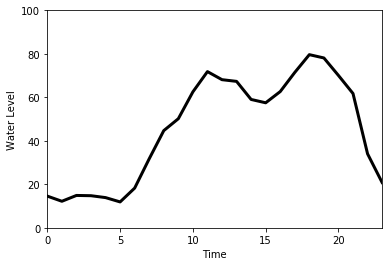

In [9]:
normal_clf = svm.OneClassSVM(nu=0.01, kernel="rbf", gamma=0.01)
normal_clf.fit(X_train)
normal_X_pred = normal_clf.predict(df_normal)
joblib.dump(normal_clf, 'normal_model.pkl')

graph(df_normal, normal_X_pred)

Abnormal data with clean dataset.

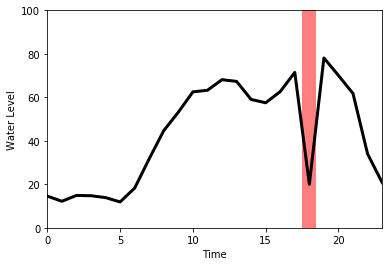

In [10]:
normal_clf = svm.OneClassSVM(nu=0.01, kernel="rbf", gamma=0.01)
normal_clf.fit(X_train)
X_pred = normal_clf.predict(df_abnormal.loc[:23, ['time', 'value']])

graph(df_abnormal, X_pred)

Abnormal data with contaminated dataset.

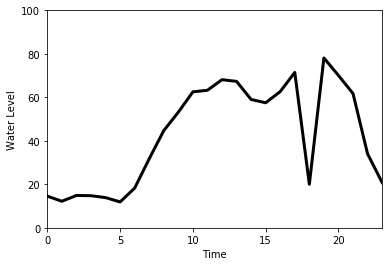

In [11]:
abnormal_clf = svm.OneClassSVM(nu=0.001, kernel="rbf", gamma=0.01)
abnormal_clf.fit(malX_train)
X_pred = abnormal_clf.predict(df_abnormal.loc[:23, ['time', 'value']])
joblib.dump(abnormal_clf, 'malicious_model.pkl')

graph(df_abnormal, X_pred)